# Import

In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Lecture et Analyse CSV

In [2]:
data = pd.read_csv('SMSSpamCollection.txt', sep='\t', names=['label', 'sms'], quoting=csv.QUOTE_NONE)

In [3]:
data

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [4]:
%pip install chardet

In [5]:
import chardet
with open('SMSSpamCollection.txt', 'rb') as file:
    raw_data = file.read(10000)
    result = chardet.detect(raw_data)
    encoding = result['encoding']
print(encoding)

utf-8


In [6]:
data.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data.tail()

,label,sms
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...
5573,ham,Rofl. Its true to its name


In [8]:
data.tail(1)

,label,sms
5573,ham,Rofl. Its true to its name


In [9]:
data.iloc[5571]

label                                                  ham
sms      Pity, * was in mood for that. So...any other s...
Name: 5571, dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5574 non-null   object
 1   sms     5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
data.shape

(5574, 2)

In [12]:
data.notnull().mean()*100

label    100.0
sms      100.0
dtype: float64

In [13]:
data.isnull().mean()*100

label    0.0
sms      0.0
dtype: float64

## Drop Duplicates

In [14]:
data[data.duplicated()]

,label,sms
103,ham,As per your request 'Melle Melle (Oru Minnamin...
154,ham,As per your request 'Melle Melle (Oru Minnamin...
207,ham,"As I entered my cabin my PA said, '' Happy B'd..."
223,ham,"Sorry, I'll call later"
326,ham,No calls..messages..missed calls
...,...,...
5526,spam,You are awarded a SiPix Digital Camera! call 0...
5537,ham,"I know you are thinkin malaria. But relax, chi..."
5541,ham,Just sleeping..and surfing
5555,ham,Hahaha..use your brain dear


In [15]:
data.duplicated().value_counts()

False    5171
True      403
Name: count, dtype: int64

In [16]:
data.drop_duplicates()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [17]:
data.rename(columns={'sms': 'texto'})

,label,texto
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


## Proportion Ham/Spam

In [18]:
data["label"].value_counts()
# possible de mettre normalize=True en parametre a value_counts() pour avoir les resultats en proportion

label
ham     4827
spam     747
Name: count, dtype: int64

In [19]:
counts = data["label"].value_counts()

In [20]:
percentages = (counts / len(data)) * 100
print(percentages)

label
ham     86.598493
spam    13.401507
Name: count, dtype: float64


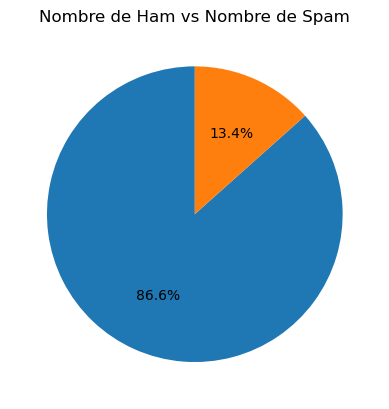

In [21]:
plt.title("Nombre de Ham vs Nombre de Spam")
plt.pie(percentages, autopct=lambda p: f'{p:.1f}%', startangle=90)
plt.show()

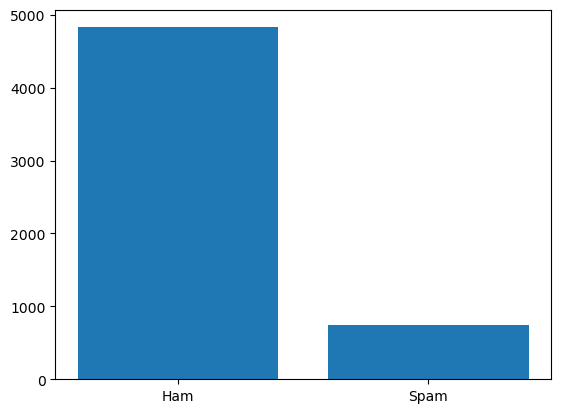

In [22]:
nb_ham_spam = np.array([4827, 747])
ham_spam = [
    "Ham",
    "Spam",
]

plt.bar(ham_spam, nb_ham_spam)
plt.show()

Déséquilibre de classes ? Le déséquilibre de classes peut influencer les performances du modèle.
==> Oui les classes sont desequilibrés et cela influe sur les performances du modele.

## Longueur des messages

In [23]:
data['longueur'] = data['sms'].apply(len)
data

,label,sms,longueur
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...,160
5570,ham,Will ü b going to esplanade fr home?,36
5571,ham,"Pity, * was in mood for that. So...any other s...",57
5572,ham,The guy did some bitching but I acted like i'd...,125


In [24]:
moyenne_longueur = data['longueur'].mean()
min_longueur = data['longueur'].min()
max_longueur = data['longueur'].max()

print(f"Moyenne : {moyenne_longueur}, Minimum : {min_longueur}, Maximum : {max_longueur}")

Moyenne : 80.47829207032652, Minimum : 2, Maximum : 910


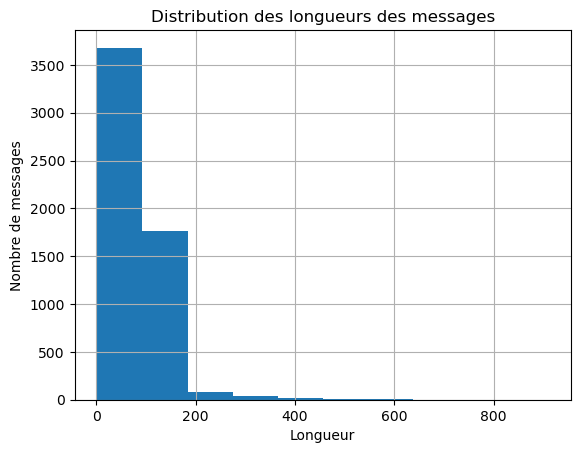

In [25]:
data['longueur'].hist(bins=10)
plt.title("Distribution des longueurs des messages")
plt.xlabel("Longueur")
plt.ylabel("Nombre de messages")
plt.show()

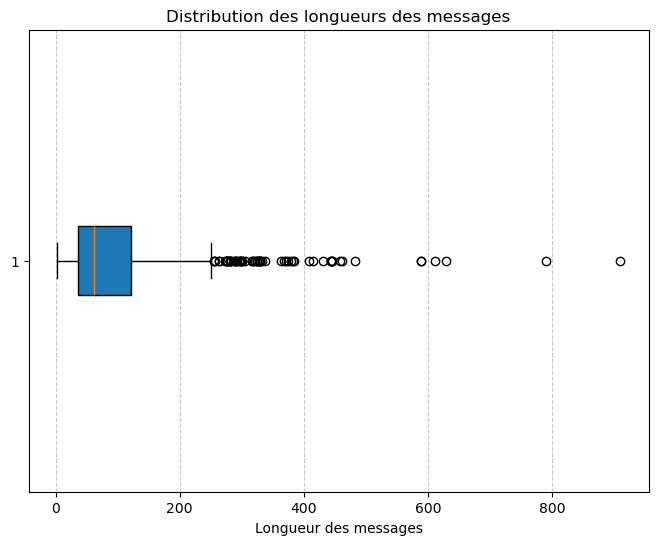

In [26]:
plt.figure(figsize=(8, 6))
plt.boxplot(data['longueur'], vert=False, patch_artist=True)

plt.title("Distribution des longueurs des messages")
plt.xlabel("Longueur des messages")
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

In [27]:
ham_longueurs = data[data['label'] == 'ham']['longueur']
spam_longueurs = data[data['label'] == 'spam']['longueur']

In [28]:
ham_longueurs

0       111
1        29
3        49
4        61
6        77
       ... 
5567     12
5570     36
5571     57
5572    125
5573     26
Name: longueur, Length: 4827, dtype: int64

In [29]:
spam_longueurs

2       155
5       147
8       157
9       154
11      136
       ... 
5539     90
5542    158
5549    160
5568    147
5569    160
Name: longueur, Length: 747, dtype: int64

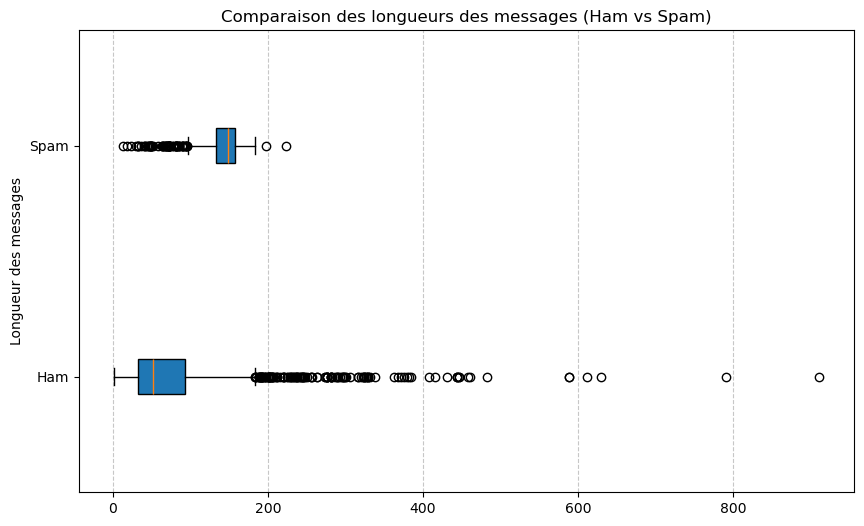

In [30]:
plt.figure(figsize=(10, 6))
plt.boxplot([ham_longueurs, spam_longueurs], tick_labels=['Ham', 'Spam'], vert=False, patch_artist=True)

plt.title("Comparaison des longueurs des messages (Ham vs Spam)")
plt.ylabel("Longueur des messages")
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

In [31]:
ham_longueurs.describe()

count    4827.000000
mean       71.471929
std        58.326643
min         2.000000
25%        33.000000
50%        52.000000
75%        93.000000
max       910.000000
Name: longueur, dtype: float64

In [32]:
spam_longueurs.describe()

count    747.000000
mean     138.676037
std       28.871250
min       13.000000
25%      133.000000
50%      149.000000
75%      157.000000
max      223.000000
Name: longueur, dtype: float64

## Nombre de mots

In [33]:
data['Nombre de mots'] = data['sms'].apply(lambda texte: len(texte.split()) if isinstance(texte, str) else 0)
data

,label,sms,longueur,Nombre de mots
0,ham,"Go until jurong point, crazy.. Available only ...",111,20
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,ham,U dun say so early hor... U c already then say...,49,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13
...,...,...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...,160,30
5570,ham,Will ü b going to esplanade fr home?,36,8
5571,ham,"Pity, * was in mood for that. So...any other s...",57,10
5572,ham,The guy did some bitching but I acted like i'd...,125,26


In [34]:
data.describe()

,longueur,Nombre de mots
count,5574.000000,5574.000000
mean,80.478292,15.591676
std,59.848302,11.390454
min,2.000000,1.000000
25%,36.000000,7.000000
50%,62.000000,12.000000
75%,122.000000,23.000000
max,910.000000,171.000000


In [35]:
data.loc[data['longueur'] == 910]['sms'].values[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

## Presence de caracteres speciaux

In [36]:
data['Contient spéciaux ou chiffres'] = data['sms'].str.contains(r'[\d]|[^a-zA-Z0-9\s]')

data.head()

,label,sms,longueur,Nombre de mots,Contient spéciaux ou chiffres
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,True
1,ham,Ok lar... Joking wif u oni...,29,6,True
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,True
3,ham,U dun say so early hor... U c already then say...,49,11,True
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,True


In [37]:
data.sms.iloc[1]

'Ok lar... Joking wif u oni...'

# Preparation du model

In [38]:
y = data["label"]
X = data[["longueur", "Nombre de mots", "Contient spéciaux ou chiffres"]]

## Encodage de y

In [39]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5569    spam
5570     ham
5571     ham
5572     ham
5573     ham
Name: label, Length: 5574, dtype: object

In [40]:
le = LabelEncoder()
le.fit(y)

LabelEncoder()

In [41]:
y = le.transform(y)

In [42]:
y

array([0, 0, 1, ..., 0, 0, 0])

## Prepapration des X

In [43]:
X

,longueur,Nombre de mots,Contient spéciaux ou chiffres
0,111,20,True
1,29,6,True
2,155,28,True
3,49,11,True
4,61,13,True
...,...,...,...
5569,160,30,True
5570,36,8,True
5571,57,10,True
5572,125,26,True


In [44]:
y = data["label"]
X = data[["longueur", "Nombre de mots", "Contient spéciaux ou chiffres"]].to_numpy()

In [45]:
X

array([[111, 20, True],
       [29, 6, True],
       [155, 28, True],
       ...,
       [57, 10, True],
       [125, 26, True],
       [26, 6, True]], dtype=object)

## Repartition des valeurs de test et d'entrainement

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

# SVC

## Pipeline

In [47]:
pipe_svc = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pipe_svc.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [48]:
y_pred = pipe_svc.predict(X_test)

## Preparation Streamlit

In [49]:
import joblib
#joblib.dump(pipe_svc, "svc.joblib")

In [50]:
pipe_svc.predict([[150, 15, False]])[0]

'ham'

In [51]:
def preprocessing(text):
    longueur = len(text)
    Nombre_de_mots = len(text.split())
    presence_speciaux_chiffres = bool(set(text).intersection(set("0123456789" + string.punctuation)))
    return [[longueur, Nombre_de_mots, presence_speciaux_chiffres]]

In [52]:
preprocessing("s@lut comment ca va")

[[19, 4, True]]

In [53]:
#pipe_svc.predict(preprocessing(input("indique ton sms >>")))[0]

In [54]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [55]:
print(y_pred)

['ham' 'ham' 'ham' ... 'ham' 'spam' 'ham']


In [56]:
print(y_test)

3312     ham
5307     ham
3487     ham
821      ham
2483     ham
        ... 
1202     ham
4526     ham
4291     ham
1635    spam
2845     ham
Name: label, Length: 1840, dtype: object


In [57]:
cm = confusion_matrix(y_test, y_pred)

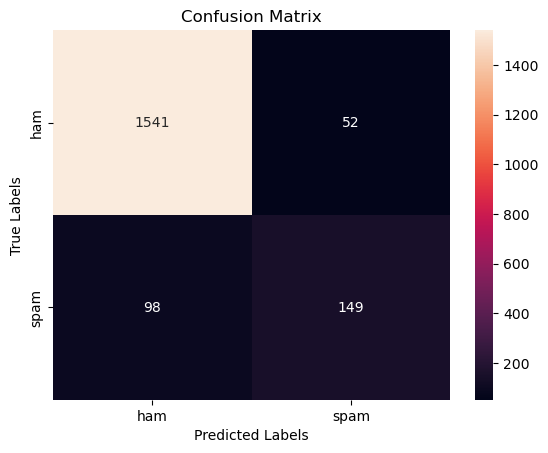

In [58]:
sns.heatmap(cm, annot=True, fmt="d", yticklabels=['ham', 'spam'], xticklabels=['ham', 'spam'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [59]:
pipe_svc.score(X_test, y_test)

0.9184782608695652

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.94      0.97      0.95      1593
        spam       0.74      0.60      0.67       247

    accuracy                           0.92      1840
   macro avg       0.84      0.79      0.81      1840
weighted avg       0.91      0.92      0.91      1840



# Logistic Regression

In [61]:
pipe_lr = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression())])
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LogisticRegression())])

In [62]:
y_pred = pipe_lr.predict(X_test)

In [63]:
print(y_pred)

['ham' 'ham' 'ham' ... 'ham' 'spam' 'ham']


In [64]:
print(y_test)

3312     ham
5307     ham
3487     ham
821      ham
2483     ham
        ... 
1202     ham
4526     ham
4291     ham
1635    spam
2845     ham
Name: label, Length: 1840, dtype: object


In [65]:
cm = confusion_matrix(y_test, y_pred)

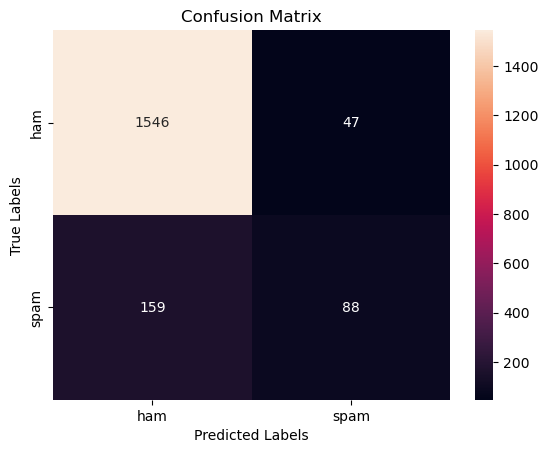

In [66]:

sns.heatmap(cm, annot=True, fmt="d", yticklabels=['ham', 'spam'], xticklabels=['ham', 'spam'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [67]:
pipe_lr.score(X_test, y_test)

0.8880434782608696

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.97      0.94      1593
        spam       0.65      0.36      0.46       247

    accuracy                           0.89      1840
   macro avg       0.78      0.66      0.70      1840
weighted avg       0.87      0.89      0.87      1840



# Random Forest 

In [69]:
pipe_rf = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier())])
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestClassifier())])

In [70]:
y_pred = pipe_rf.predict(X_test)

In [71]:
print(y_pred)

['ham' 'spam' 'ham' ... 'ham' 'spam' 'ham']


In [72]:
print(y_test)

3312     ham
5307     ham
3487     ham
821      ham
2483     ham
        ... 
1202     ham
4526     ham
4291     ham
1635    spam
2845     ham
Name: label, Length: 1840, dtype: object


In [73]:
cm = confusion_matrix(y_test, y_pred)

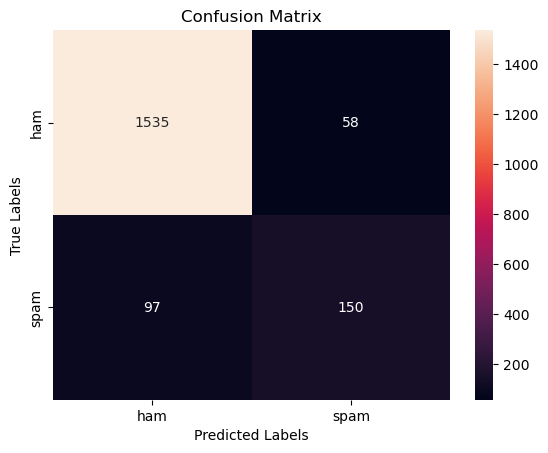

In [74]:
sns.heatmap(cm, annot=True, fmt="d", yticklabels=['ham', 'spam'], xticklabels=['ham', 'spam'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [75]:
pipe_rf.score(X_test, y_test)

0.9157608695652174

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.94      0.96      0.95      1593
        spam       0.72      0.61      0.66       247

    accuracy                           0.92      1840
   macro avg       0.83      0.79      0.81      1840
weighted avg       0.91      0.92      0.91      1840

